In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

print("="*70)
print("HAYES-ROTH CLASSIFICATION PROJECT")
print("="*70)
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print("="*70)


HAYES-ROTH CLASSIFICATION PROJECT
TensorFlow Version: 2.19.0
Keras Version: 3.10.0


In [3]:
# ==================== 1. DATA LOADING ====================
print("\n[1] DATA LOADING")
print("-"*70)

# Load data (sesuaikan path jika menggunakan Google Colab)
# Untuk Google Colab, upload file terlebih dahulu atau gunakan URL
data_url = "hayes-roth.data"  # Ganti dengan path file Anda

# Column names berdasarkan dokumentasi UCI
column_names = ['name', 'hobby', 'age', 'educational_level', 'marital_status', 'class']

try:
    # Load data
    df = pd.read_csv(data_url, names=column_names)
    print("✓ Data loaded successfully!")
    print(f"Dataset shape: {df.shape}")
except:
    print("Error loading data. Creating sample data for demonstration...")
    # Sample data untuk testing jika file tidak tersedia
    df = pd.DataFrame({
        'name': range(1, 133),
        'hobby': np.random.randint(1, 4, 132),
        'age': np.random.randint(1, 5, 132),
        'educational_level': np.random.randint(1, 5, 132),
        'marital_status': np.random.randint(1, 5, 132),
        'class': np.random.randint(1, 4, 132)
    })

# Display basic info
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nBasic Statistics:")
print(df.describe())

# Check missing values
print(f"\nMissing values:\n{df.isnull().sum()}")


[1] DATA LOADING
----------------------------------------------------------------------
✓ Data loaded successfully!
Dataset shape: (132, 6)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   name               132 non-null    int64
 1   hobby              132 non-null    int64
 2   age                132 non-null    int64
 3   educational_level  132 non-null    int64
 4   marital_status     132 non-null    int64
 5   class              132 non-null    int64
dtypes: int64(6)
memory usage: 6.3 KB
None

First 5 rows:
   name  hobby  age  educational_level  marital_status  class
0    92      2    1                  1               2      1
1    10      2    1                  3               2      2
2    83      3    1                  4               1      3
3    61      2    4                  2               2      3
4   

In [4]:
# ==================== 2. EXPLORATORY DATA ANALYSIS ====================
print("\n[2] EXPLORATORY DATA ANALYSIS")
print("-"*70)

# Create images directory
import os
os.makedirs('images', exist_ok=True)


[2] EXPLORATORY DATA ANALYSIS
----------------------------------------------------------------------


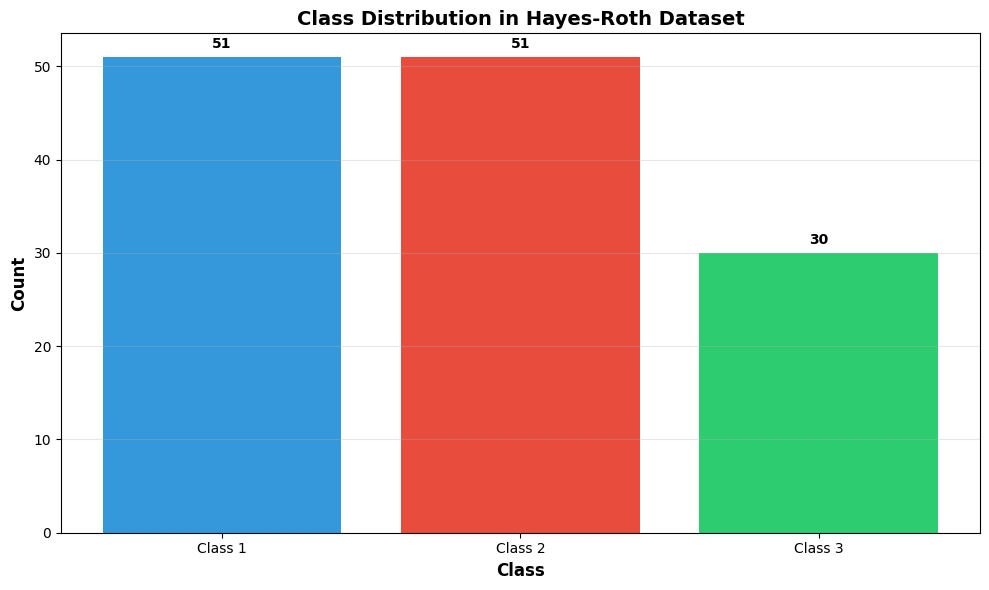

✓ Class distribution plot saved!


In [5]:
# 2.1 Class Distribution
plt.figure(figsize=(10, 6))
class_counts = df['class'].value_counts().sort_index()
plt.bar(class_counts.index, class_counts.values, color=['#3498db', '#e74c3c', '#2ecc71'])
plt.xlabel('Class', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Class Distribution in Hayes-Roth Dataset', fontsize=14, fontweight='bold')
plt.xticks([1, 2, 3], ['Class 1', 'Class 2', 'Class 3'])
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(class_counts.values):
    plt.text(class_counts.index[i], v + 1, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.savefig('images/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Class distribution plot saved!")

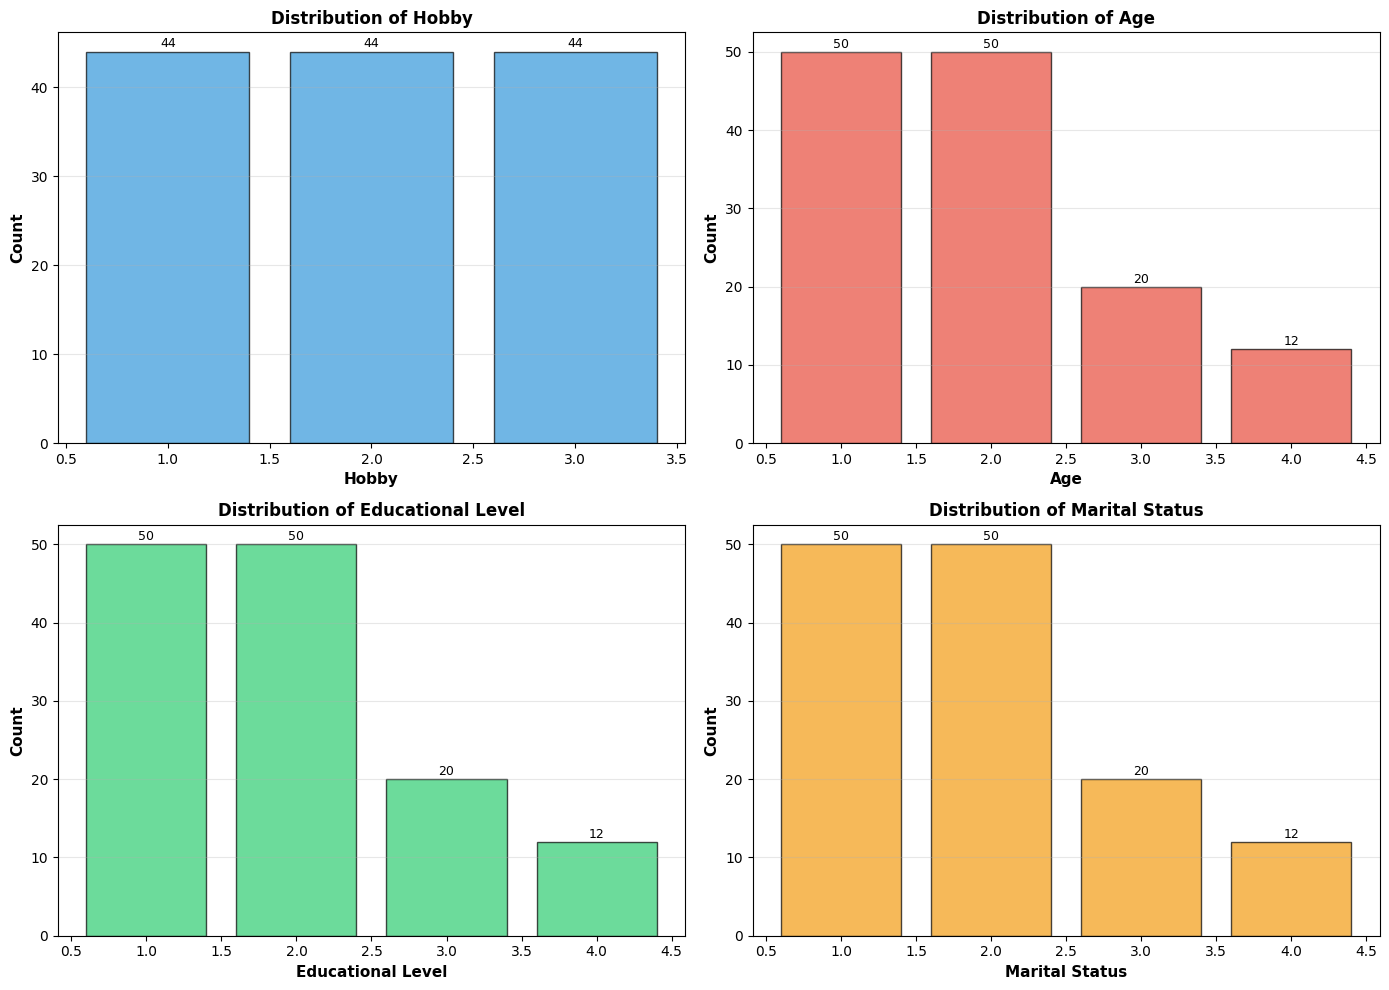

✓ Feature distribution plot saved!


In [6]:
# 2.2 Feature Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
features = ['hobby', 'age', 'educational_level', 'marital_status']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (ax, feature, color) in enumerate(zip(axes.flat, features, colors)):
    counts = df[feature].value_counts().sort_index()
    ax.bar(counts.index, counts.values, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel('Count', fontsize=11, fontweight='bold')
    ax.set_title(f'Distribution of {feature.replace("_", " ").title()}',
                 fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    for i, v in enumerate(counts.values):
        ax.text(counts.index[i], v + 0.5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('images/feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Feature distribution plot saved!")

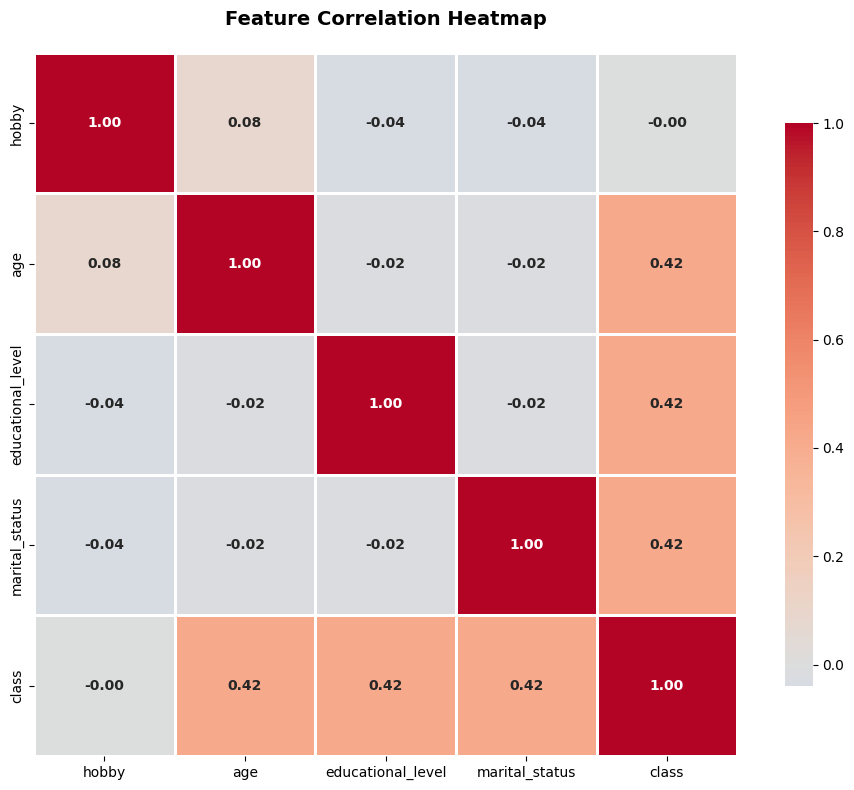

✓ Correlation heatmap saved!


In [7]:
# 2.3 Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df[['hobby', 'age', 'educational_level', 'marital_status', 'class']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('images/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Correlation heatmap saved!")

In [8]:
# Statistical Summary
print("\nDataset Statistics:")
print(f"Total Instances: {len(df)}")
print(f"Number of Features: {len(features)}")
print(f"Number of Classes: {df['class'].nunique()}")
print(f"\nClass Distribution:")
for class_label, count in class_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  Class {class_label}: {count} instances ({percentage:.1f}%)")


Dataset Statistics:
Total Instances: 132
Number of Features: 4
Number of Classes: 3

Class Distribution:
  Class 1: 51 instances (38.6%)
  Class 2: 51 instances (38.6%)
  Class 3: 30 instances (22.7%)


In [11]:
# ==================== 3. DATA PREPARATION ====================
print("\n[3] DATA PREPARATION")
print("-"*70)

# Drop ID column
df_clean = df.drop('name', axis=1)
print("✓ ID column dropped")

X = df_clean.drop('class', axis=1)
y = df_clean['class']

# Convert class labels from 1-3 to 0-2
y = y - 1
print(f"✓ Target encoded: Classes [1,2,3] → [0,1,2]")

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target classes: {sorted(y.unique())}")

#Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Data split completed (80-20):")
print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

print(f"\nClass distribution in training set:")
print(y_train.value_counts().sort_index())
print(f"\nClass distribution in test set:")
print(y_test.value_counts().sort_index())

#Feature Scaling (Untuk Neural Network)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n✓ Feature scaling applied (StandardScaler)")

#Save scaler
os.makedirs('models', exist_ok=True)
joblib.dump(scaler, 'models/scaler.pkl')
print("✓ Scaler saved to 'models/scaler.pkl'")


[3] DATA PREPARATION
----------------------------------------------------------------------
✓ ID column dropped
✓ Target encoded: Classes [1,2,3] → [0,1,2]

Features shape: (132, 4)
Target shape: (132,)
Target classes: [np.int64(0), np.int64(1), np.int64(2)]

✓ Data split completed (80-20):
  Training set: 105 samples
  Test set: 27 samples

Class distribution in training set:
class
0    40
1    41
2    24
Name: count, dtype: int64

Class distribution in test set:
class
0    11
1    10
2     6
Name: count, dtype: int64

✓ Feature scaling applied (StandardScaler)
✓ Scaler saved to 'models/scaler.pkl'



[4] MODEL 1: LOGISTIC REGRESSION (BASELINE)
----------------------------------------------------------------------
Training Logistic Regression...
✓ Logistic Regression training completed!

📊 LOGISTIC REGRESSION RESULTS:
  Training Accuracy: 0.5905
  Test Accuracy:     0.7037
  Precision (macro): 0.7809
  Recall (macro):    0.6758
  F1-Score (macro):  0.6965

Classification Report:
              precision    recall  f1-score   support

     Class 0     0.7273    0.7273    0.7273        11
     Class 1     0.6154    0.8000    0.6957        10
     Class 2     1.0000    0.5000    0.6667         6

    accuracy                         0.7037        27
   macro avg     0.7809    0.6758    0.6965        27
weighted avg     0.7464    0.7037    0.7021        27



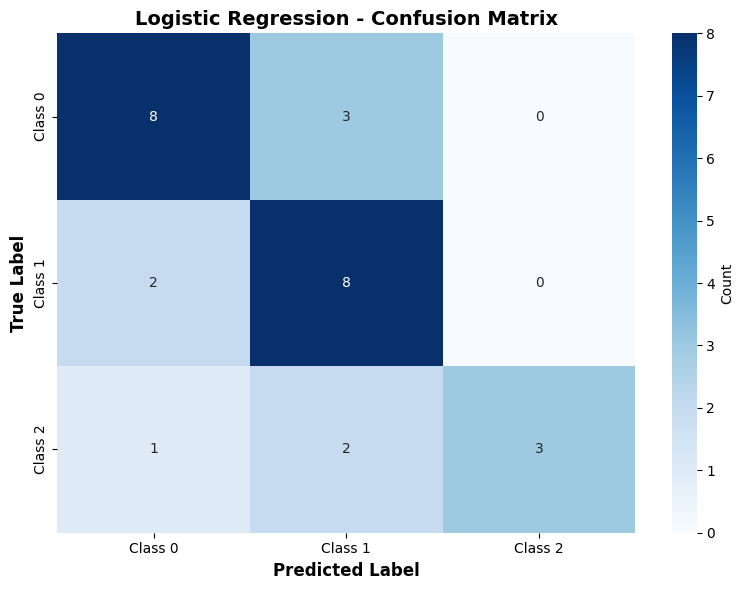


✓ Logistic Regression model saved to 'models/logistic_regression_model.pkl'


In [10]:
print("\n[4] MODEL 1: LOGISTIC REGRESSION (BASELINE)")
print("-"*70)

# Train Logistic Regression
lr_model = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

print("Training Logistic Regression...")
lr_model.fit(X_train_scaled, y_train)
print("✓ Logistic Regression training completed!")

# Predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)

# Evaluation
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_precision = precision_score(y_test, lr_test_pred, average='macro')
lr_recall = recall_score(y_test, lr_test_pred, average='macro')
lr_f1 = f1_score(y_test, lr_test_pred, average='macro')

print("\nHASIL LOGISTIC REGRESSION:")
print(f"  Training Accuracy: {lr_train_acc:.4f}")
print(f"  Test Accuracy:     {lr_test_acc:.4f}")
print(f"  Precision (macro): {lr_precision:.4f}")
print(f"  Recall (macro):    {lr_recall:.4f}")
print(f"  F1-Score (macro):  {lr_f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, lr_test_pred,
                          target_names=['Class 0', 'Class 1', 'Class 2'],
                          digits=4))

# Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'],
            cbar_kws={'label': 'Count'})
plt.title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('images/lr_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Save model
joblib.dump(lr_model, 'models/logistic_regression_model.pkl')
print("\n✓ Logistic Regression model saved to 'models/logistic_regression_model.pkl'")


[5] MODEL 2: RANDOM FOREST (ADVANCED)
----------------------------------------------------------------------
Training Random Forest...
✓ Random Forest training completed!

 HASIL RANDOM FOREST:
  Training Accuracy: 0.9333
  Test Accuracy:     0.7037
  Precision (macro): 0.7468
  Recall (macro):    0.7424
  F1-Score (macro):  0.7407

Classification Report:
              precision    recall  f1-score   support

     Class 0     0.6154    0.7273    0.6667        11
     Class 1     0.6250    0.5000    0.5556        10
     Class 2     1.0000    1.0000    1.0000         6

    accuracy                         0.7037        27
   macro avg     0.7468    0.7424    0.7407        27
weighted avg     0.7044    0.7037    0.6996        27



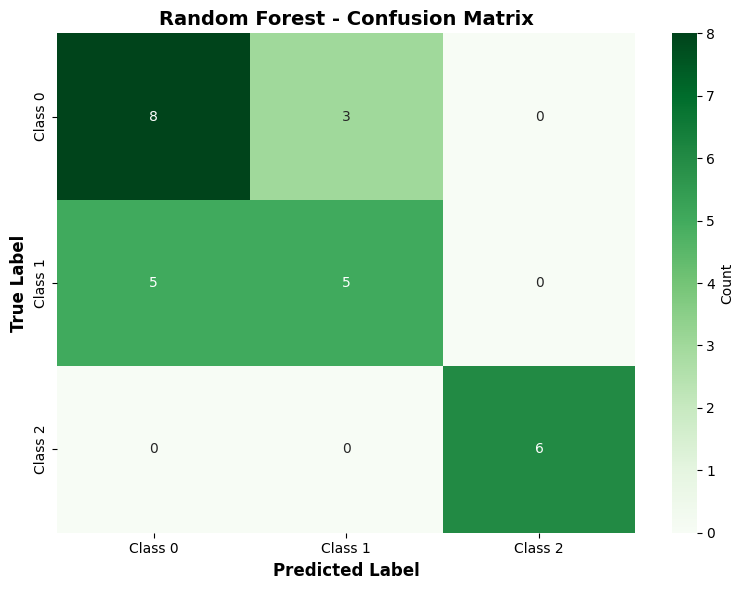


FEATURE IMPORTANCE:
  educational_level   : 0.3312
  age                 : 0.3078
  marital_status      : 0.2946
  hobby               : 0.0664


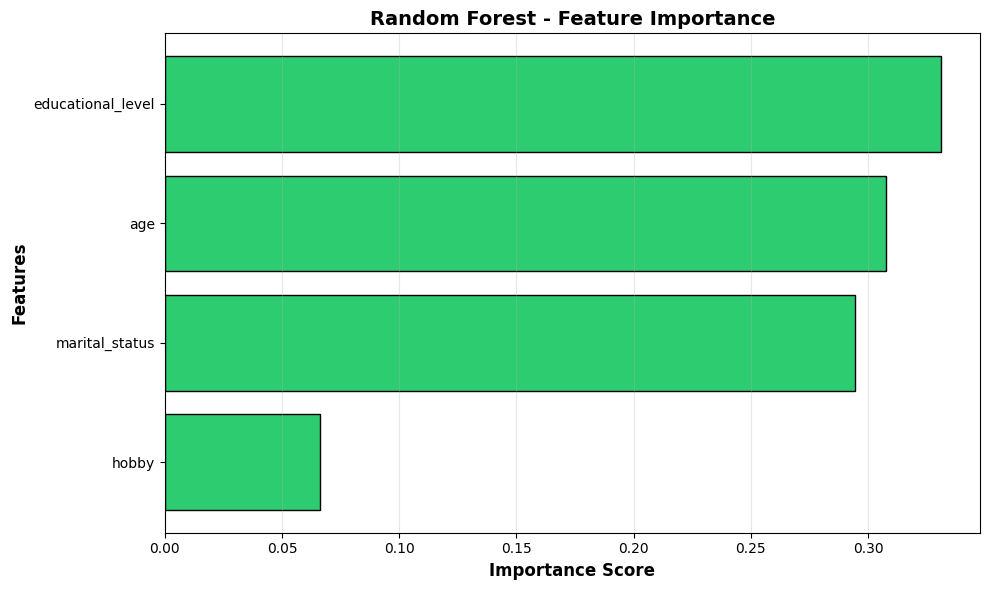


✓ Random Forest model saved to 'models/random_forest_model.pkl'


In [12]:
# ==================== 5. MODEL 2: RANDOM FOREST ====================
print("\n[5] MODEL 2: RANDOM FOREST (ADVANCED)")
print("-"*70)

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

print("Training Random Forest...")
rf_model.fit(X_train, y_train)
print("✓ Random Forest training completed!")

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

# Evaluation
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='macro')
rf_recall = recall_score(y_test, rf_test_pred, average='macro')
rf_f1 = f1_score(y_test, rf_test_pred, average='macro')

print("\n HASIL RANDOM FOREST:")
print(f"  Training Accuracy: {rf_train_acc:.4f}")
print(f"  Test Accuracy:     {rf_test_acc:.4f}")
print(f"  Precision (macro): {rf_precision:.4f}")
print(f"  Recall (macro):    {rf_recall:.4f}")
print(f"  F1-Score (macro):  {rf_f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, rf_test_pred,
                          target_names=['Class 0', 'Class 1', 'Class 2'],
                          digits=4))

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'],
            cbar_kws={'label': 'Count'})
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('images/rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE:")
for idx, row in feature_importance.iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:.4f}")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'],
         color='#2ecc71', edgecolor='black')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('images/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Save model
joblib.dump(rf_model, 'models/random_forest_model.pkl')
print("\n✓ Random Forest model saved to 'models/random_forest_model.pkl'")


[6] MODEL 3: NEURAL NETWORK (DEEP LEARNING)
----------------------------------------------------------------------

NEURAL NETWORK ARCHITECTURE:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)


Training Neural Network...
Epoch 1/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5000 - loss: 1.0502

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.3757 - loss: 1.1318 - val_accuracy: 0.3333 - val_loss: 1.1207
Epoch 2/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3750 - loss: 1.0019

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3933 - loss: 1.0939 - val_accuracy: 0.3810 - val_loss: 1.0857
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5671 - loss: 1.0029 - val_accuracy: 0.2857 - val_loss: 1.0568
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3497 - loss: 1.0590 - val_accuracy: 0.2857 - val_loss: 1.0304
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4843 - loss: 0.9926 - val_accuracy: 0.2857 - val_loss: 1.0052
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5111 - loss: 0.9180 - val_accuracy: 0.2857 - val_loss: 0.9796
Epoch 7/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8750 - loss: 0.6855

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5864 - loss: 0.8706 - val_accuracy: 0.4286 - val_loss: 0.9562
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6029 - loss: 0.8559 - val_accuracy: 0.4286 - val_loss: 0.9373
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5597 - loss: 0.8147 - val_accuracy: 0.4286 - val_loss: 0.9164
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5293 - loss: 0.7875 - val_accuracy: 0.4286 - val_loss: 0.9003
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5883 - loss: 0.8207 - val_accuracy: 0.4286 - val_loss: 0.8855
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5376 - loss: 0.7780 - val_accuracy: 0.4286 - val_loss: 0.8690
Epoch 13/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7500 - loss: 0.6339

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5807 - loss: 0.7650 - val_accuracy: 0.6190 - val_loss: 0.8509
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6298 - loss: 0.7538 - val_accuracy: 0.5238 - val_loss: 0.8358
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6505 - loss: 0.7002 - val_accuracy: 0.5238 - val_loss: 0.8208
Epoch 16/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6020 - loss: 0.7270 - val_accuracy: 0.5238 - val_loss: 0.8098
Epoch 17/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6514 - loss: 0.6869 - val_accuracy: 0.5238 - val_loss: 0.8006
Epoch 18/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5681 - loss: 0.7054 - val_accuracy: 0.5714 - val_loss: 0.7951
Epoch 19/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6262 - loss: 0.7237 - val_accuracy: 0.5238 - val_loss: 0.7916
Epoch 20/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6780 - loss: 0.6567 - val_accuracy: 0.5238 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7066 - loss: 0.6124 - val_accuracy: 0.6667 - val_loss: 0.7270
Epoch 39/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7206 - loss: 0.5521 - val_accuracy: 0.6667 - val_loss: 0.7236
Epoch 40/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7075 - loss: 0.6220 - val_accuracy: 0.6667 - val_loss: 0.7207
Epoch 41/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7583 - loss: 0.5611 - val_accuracy: 0.6667 - val_loss: 0.7198
Epoch 42/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7843 - loss: 0.5596 - val_accuracy: 0.6667 - val_loss: 0.7187
Epoch 43/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7015 - loss: 0.5927 - val_accuracy: 0.6667 - val_loss: 0.7125
Epoch 44/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6602 - loss: 0.6010 - val_accuracy: 0.6667 - val_loss: 0.7052
Epoch 45/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7366 - loss: 0.5609 - val_accuracy: 0.6667 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8095 - loss: 0.4635 - val_accuracy: 0.7143 - val_loss: 0.6628
Epoch 65/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8475 - loss: 0.4115 - val_accuracy: 0.7143 - val_loss: 0.6590
Epoch 66/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8211 - loss: 0.4968 - val_accuracy: 0.7143 - val_loss: 0.6598
Epoch 67/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8425 - loss: 0.4700 - val_accuracy: 0.6667 - val_loss: 0.6603
Epoch 68/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8019 - loss: 0.4236 - val_accuracy: 0.6667 - val_loss: 0.6583
Epoch 69/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7955 - loss: 0.4697 - val_accuracy: 0.6667 - val_loss: 0.6540
Epoch 70/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7987 - loss: 0.4474 - val_accuracy: 0.7143 - val_loss: 0.6527
Epoch 71/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6768 - loss: 0.5387 - val_accuracy: 0.7143 - 

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7972 - loss: 0.4404 - val_accuracy: 0.7619 - val_loss: 0.6458
Epoch 79/100
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.2970

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8351 - loss: 0.4409 - val_accuracy: 0.8095 - val_loss: 0.6399
Epoch 80/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8291 - loss: 0.4556 - val_accuracy: 0.7619 - val_loss: 0.6340
Epoch 81/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8436 - loss: 0.4155 - val_accuracy: 0.7619 - val_loss: 0.6299
Epoch 82/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8425 - loss: 0.3948 - val_accuracy: 0.7619 - val_loss: 0.6285
Epoch 83/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7772 - loss: 0.4668 - val_accuracy: 0.7619 - val_loss: 0.6288
Epoch 84/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8508 - loss: 0.4053 - val_accuracy: 0.7619 - val_loss: 0.6272
Epoch 85/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7734 - loss: 0.4725 - val_accuracy: 0.7619 - val_loss: 0.6180
Epoch 86/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8435 - loss: 0.3784 - val_accuracy: 0.7619 

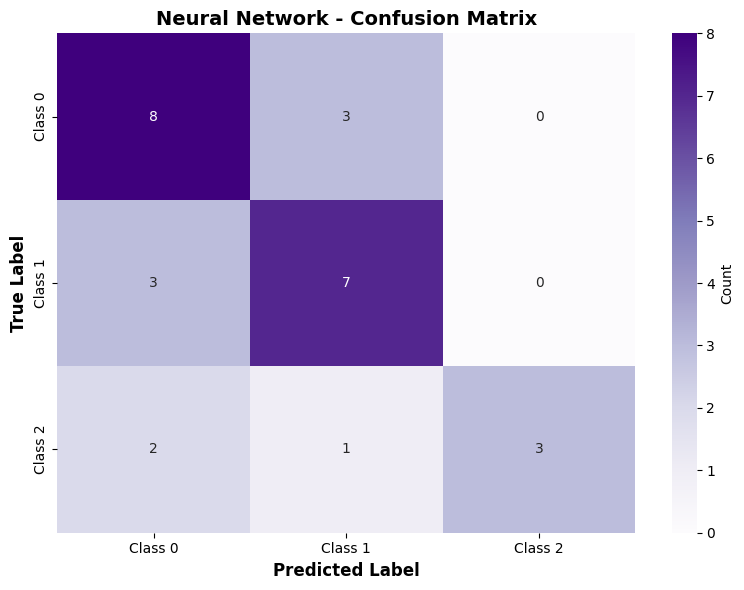

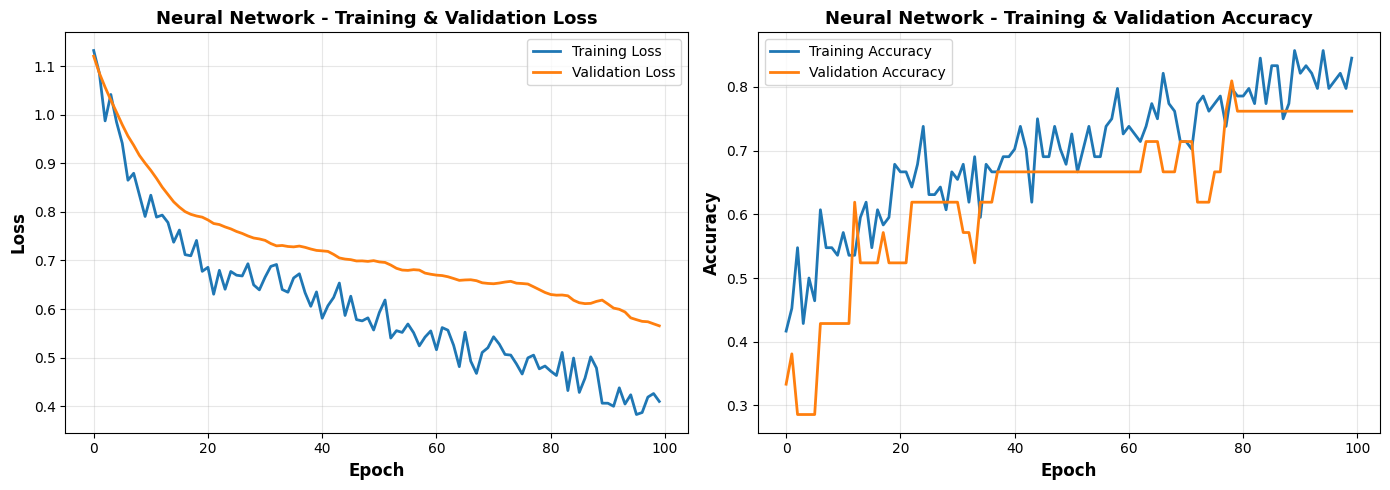


✓ Neural Network model saved to 'models/neural_network_model.h5'


In [13]:
# ==================== 6. MODEL 3: NEURAL NETWORK ====================
print("\n[6] MODEL 3: NEURAL NETWORK (DEEP LEARNING)")
print("-"*70)

# Build Neural Network Architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compile model
nn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
print("\nNEURAL NETWORK ARCHITECTURE:")
nn_model.summary()

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    filepath='models/nn_best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=0
)

# Train model
print("\nTraining Neural Network...")
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

print("\n✓ Neural Network training completed!")

# Predictions
nn_train_pred_proba = nn_model.predict(X_train_scaled, verbose=0)
nn_test_pred_proba = nn_model.predict(X_test_scaled, verbose=0)
nn_train_pred = np.argmax(nn_train_pred_proba, axis=1)
nn_test_pred = np.argmax(nn_test_pred_proba, axis=1)

# Evaluation
nn_train_acc = accuracy_score(y_train, nn_train_pred)
nn_test_acc = accuracy_score(y_test, nn_test_pred)
nn_precision = precision_score(y_test, nn_test_pred, average='macro')
nn_recall = recall_score(y_test, nn_test_pred, average='macro')
nn_f1 = f1_score(y_test, nn_test_pred, average='macro')

print("\nHASIL NEURAL NETWORK:")
print(f"  Training Accuracy: {nn_train_acc:.4f}")
print(f"  Test Accuracy:     {nn_test_acc:.4f}")
print(f"  Precision (macro): {nn_precision:.4f}")
print(f"  Recall (macro):    {nn_recall:.4f}")
print(f"  F1-Score (macro):  {nn_f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, nn_test_pred,
                          target_names=['Class 0', 'Class 1', 'Class 2'],
                          digits=4))

# Confusion Matrix
nn_cm = confusion_matrix(y_test, nn_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'],
            cbar_kws={'label': 'Count'})
plt.title('Neural Network - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('images/nn_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot Training History
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax1.set_ylabel('Loss', fontsize=12, fontweight='bold')
ax1.set_title('Neural Network - Training & Validation Loss',
              fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
ax2.set_xlabel('Epoch', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Neural Network - Training & Validation Accuracy',
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/training_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Save final model
nn_model.save('models/neural_network_model.h5')
print("\n✓ Neural Network model saved to 'models/neural_network_model.h5'")


[7] MODEL COMPARISON
----------------------------------------------------------------------

FINAL MODEL COMPARISON:
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.703704   0.780886 0.675758  0.696531
      Random Forest  0.703704   0.746795 0.742424  0.740741
     Neural Network  0.666667   0.750583 0.642424  0.666667


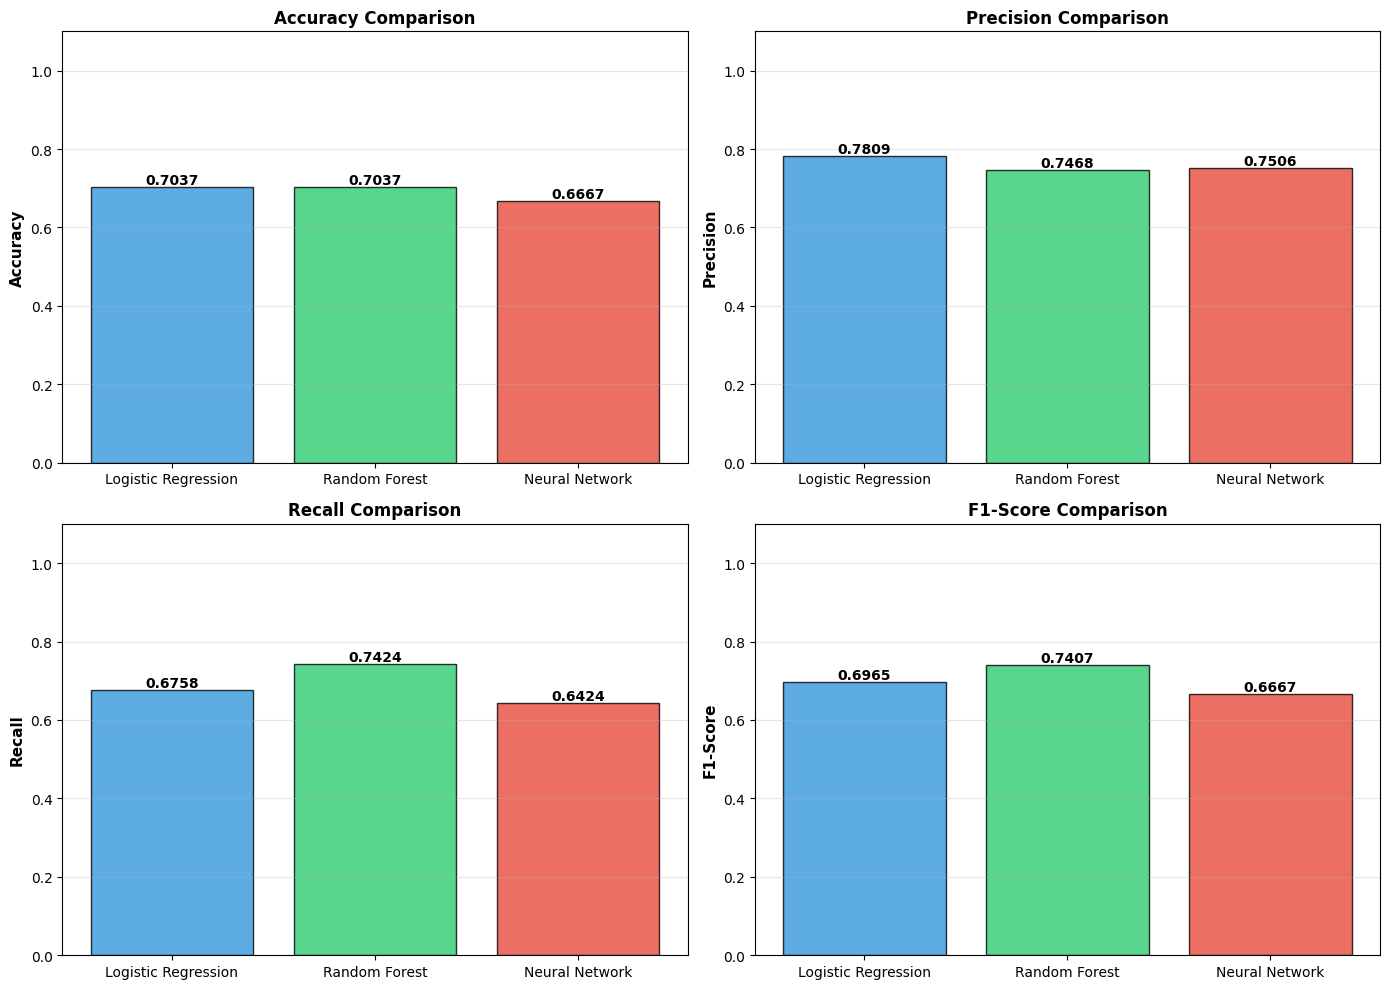


BEST MODEL: Random Forest
   F1-Score: 0.7407


In [16]:
# ==================== 7. MODEL COMPARISON ====================
print("\n[7] MODEL COMPARISON")
print("-"*70)

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [lr_test_acc, rf_test_acc, nn_test_acc],
    'Precision': [lr_precision, rf_precision, nn_precision],
    'Recall': [lr_recall, rf_recall, nn_recall],
    'F1-Score': [lr_f1, rf_f1, nn_f1]
})

print("\nFINAL MODEL COMPARISON:")
print(comparison_df.to_string(index=False))

# Plot comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#2ecc71', '#e74c3c']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    values = comparison_df[metric].values
    bars = ax.bar(comparison_df['Model'], values, color=colors, alpha=0.8, edgecolor='black')
    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1.1])
    ax.grid(axis='y', alpha=0.3)

    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.4f}', ha='center', va='bottom',
                fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('images/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Best model determination
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1_score = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\nBEST MODEL: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

In [18]:
# ==================== 9. SUMMARY ====================
print("\n" + "="*70)
print("PROJECT SUMMARY")
print("="*70)
print(f"\n✓ Dataset: Hayes-Roth Classification")
print(f"✓ Total Instances: {len(df)}")
print(f"✓ Features: {len(features)}")
print(f"✓ Classes: {df['class'].nunique()}")
print(f"✓ Train/Test Split: 80/20")
print(f"\n✓ Models Trained:")
print(f"  1. Logistic Regression - Accuracy: {lr_test_acc:.4f}")
print(f"  2. Random Forest       - Accuracy: {rf_test_acc:.4f}")
print(f"  3. Neural Network      - Accuracy: {nn_test_acc:.4f}")
print(f"\n✓ Best Model: {best_model_name} (F1-Score: {best_f1_score:.4f})")
print(f"\n✓ All models saved to 'models/' directory")
print(f"✓ All visualizations saved to 'images/' directory")
print("\n" + "="*70)
print("PROJECT COMPLETED SUCCESSFULLY! 🎉")
print("="*70)


PROJECT SUMMARY

✓ Dataset: Hayes-Roth Classification
✓ Total Instances: 132
✓ Features: 4
✓ Classes: 3
✓ Train/Test Split: 80/20

✓ Models Trained:
  1. Logistic Regression - Accuracy: 0.7037
  2. Random Forest       - Accuracy: 0.7037
  3. Neural Network      - Accuracy: 0.6667

✓ Best Model: Random Forest (F1-Score: 0.7407)

✓ All models saved to 'models/' directory
✓ All visualizations saved to 'images/' directory

PROJECT COMPLETED SUCCESSFULLY! 🎉


In [19]:
# ==================== 10. PREDICTION EXAMPLE ====================
print("\n[10] PREDICTION EXAMPLE")
print("-"*70)

# Create sample input for prediction
sample_input = pd.DataFrame({
    'hobby': [2],
    'age': [3],
    'educational_level': [2],
    'marital_status': [1]
})

# Scale input untuk Logistic Regression dan Neural Network
sample_input_scaled = scaler.transform(sample_input)

print("\nSample Input:")
print(sample_input)

# Predict menggunakan 3 model
lr_pred = lr_model.predict(sample_input_scaled)
rf_pred = rf_model.predict(sample_input)
nn_pred_proba = nn_model.predict(sample_input_scaled, verbose=0)
nn_pred = np.argmax(nn_pred_proba, axis=1)

print("\nPredictions:")
print(f"  Logistic Regression: Class {lr_pred[0]}")
print(f"  Random Forest:       Class {rf_pred[0]}")
print(f"  Neural Network:      Class {nn_pred[0]} (confidence: {nn_pred_proba[0][nn_pred[0]]:.4f})")


[10] PREDICTION EXAMPLE
----------------------------------------------------------------------

Sample Input:
   hobby  age  educational_level  marital_status
0      2    3                  2               1

Predictions:
  Logistic Regression: Class 1
  Random Forest:       Class 0
  Neural Network:      Class 1 (confidence: 0.6989)
